## Maschinelles Lernen WiSe 2022
### Praktikum 4

Lineare Klassifikation auf künstlich generierten Beispieldaten:
Lineare Regression, LogitRegression, SoftmaxRegression, Polynommerkmale

In [1]:
# necessary includes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn import linear_model

# colors for display
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])


#### Beispieldaten erzeugen
Generieren Sie einen Beispieldatensatz und visualisieren diesen, so lange, bis Ihnen der Datensatz gefällt... :-)
Starten Sie mit einem "Moons" Datensatz mit einem Rauschfaktor von mindestens 0.2 (noise=0.2)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons


In [2]:
X, y = make_moons(n_samples=100, noise=0.2)

Erzeugen eines Logit-Klasifikators mit dem solver "liblinear", der die Daten klassifizieren soll:

In [3]:
logReg = linear_model.LogisticRegression( multi_class='multinomial', solver='lbfgs')

Trainieren Sie nun den lineaern Klassifikator mit den oben erzeugten Daten:

In [4]:
logReg.fit(X,y)
logReg.predict(X)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

Nun wollen wir die Entscheidungsgrenzen des Klassifikators anzeigen, in dem wir alle Hintergrundpunkte in der Umgebung der Trainingsdaten klassifizieren lassen. Die Erzeugung der zu klassifizierenden Hintergrundpunkte (`meshPointsToClassify`) ist bereits vorgegeben:

In [5]:
# show decision boundary of the classifier:
# idea: generate coordinates for a dense mesh, classify each of these points

# first: get the rough range where the data points lie (to generate appropriate values)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh

# we need all combinations for the x and y coordinates
#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.meshgrid.html
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# The result of meshgrid are N N-D matrices. Here: two 2D-Matrices. In order to
# get the points into the classifier, we have to flatten the matrices 
# and put them into a new matrix with 
# => https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ravel.html
# => https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.c_.html
meshPointsToClassify = np.c_[xx.ravel(), yy.ravel()]
print(meshPointsToClassify)

[[-1.67036511 -1.19988092]
 [-1.65036511 -1.19988092]
 [-1.63036511 -1.19988092]
 ...
 [ 2.60963489  1.92011908]
 [ 2.62963489  1.92011908]
 [ 2.64963489  1.92011908]]


Klassifizieren Sie nun die Hintergrundpunkte, und legen Sie die Ergebnisse in der Variable `predicition`
ab. 

In [6]:
prediction = logReg.predict(meshPointsToClassify)

Anzeigen der Klassifikationsgrenze, zusammen mit den Trainingsdaten:

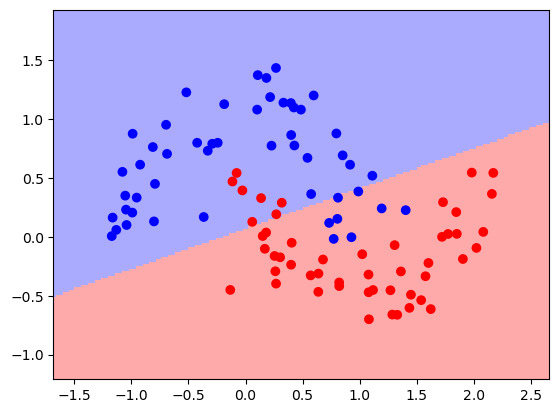

In [7]:
# to bring the predicted labels in a form that the plotcolormesh understands
prediction = prediction.reshape(xx.shape) 
plt.pcolormesh(xx, yy, prediction, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=cmap_bold)
plt.show()

### Polynomklassifikator
Erzeugen Sie Polynommerkmale für die eben klassifizierten Daten und wiederholen Sie das Training sowie die Klassifikation der Ebenenpunkte. Starten Sie mit Polynomgrad 3, und erhöhen Sie später.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True, order='C')


Trainieren Sie den Klassifikator mit den Polynommerkmalen.

In [9]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(poly_feat, logReg)



Klassifizieren Sie nun die Hintergrundpunkte erneut. Vorsicht: wie müssen nun die Merkmale für die Ebenenpunkte aussehen? Speichern Sie die neuen Ebenenpunktmerkmale in der Variable `polyMeshPointsToClassify`.

Legen Sie die Klassifikationsergebnisse in der Variable `polyPredicition` ab. 

In [12]:
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


meshPointsToClassify = np.c_[xx.ravel(), yy.ravel()]

#polyMeshPointsToClassify = pipeline.fit(X_train, y_train)
polyPrediction = pipeline.predict(meshPointsToClassify) 

Mit folgendem Code werden die neuen Klassifikationsgrenzen gezeigt:

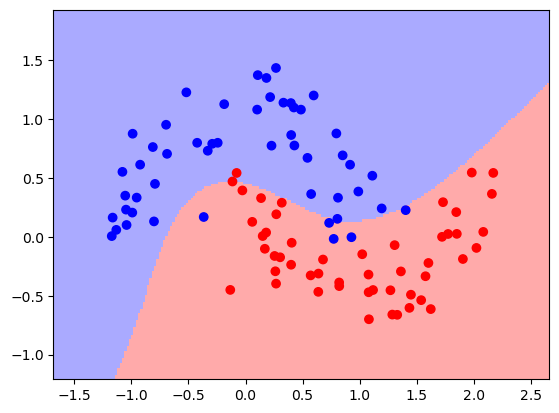

In [13]:
# plot the classified points
polyPrediction = polyPrediction.reshape(xx.shape)
plt.pcolormesh(xx, yy, polyPrediction, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=cmap_bold)
plt.show()

Verwenden Sie nun Polynommerkmale höheren Grades.

#### Zusatzaufgabe:
Sie können ebenso weitere lineare Klassifikatoren ausprobieren, und sich die Klassifikationsgebiete anzeigen lassen. Möglichke Klassikfikatoren siehe:
http://scikit-learn.org/stable/modules/linear_model.html